In [1]:

# Un commentaire commence par un #
# Importation d'un module
import numpy as np
# Les modules contiennent tout le materiel specialise

# boucle for
for i in range(0,10):
    print ("Le chiffre est :", i)
    # L'indentation est obligatoire en python, elle sert d'element syntaxique
    # print sert a afficher a l'ecran.
    
animaux=["canards", "ours", "chevres", "loups","alpagas"]
# Fin de l'indentation, la boucle for est finie
# On peut boucler sur un peu n'importe quoi,..
for ani in animaux:
    print ("Bruno aime les ", ani)

Le chiffre est : 0
Le chiffre est : 1
Le chiffre est : 2
Le chiffre est : 3
Le chiffre est : 4
Le chiffre est : 5
Le chiffre est : 6
Le chiffre est : 7
Le chiffre est : 8
Le chiffre est : 9
Bruno aime les  canards
Bruno aime les  ours
Bruno aime les  chevres
Bruno aime les  loups
Bruno aime les  alpagas


In [2]:
b=range(0,10)
# b vaut [0,1,2,...,9]
# La numerotation des tableaux en python commence a 0 et fini a n-1 comme en C
print (b[0], b[9])
# imprime le premier element et le dernier
# On aurait aussi pu faire:
print (b[0],b[-1])
# -1 est le dernier indice, -2 l'avant dernier, etc.
a=15
# Test logiques
if (a<10):
    print("a est inferieur a 10")
elif (a>10):
    print("a est superieur a 10")
else:
    print("a est egal a 10")

0 9
0 9
a est superieur a 10


In [3]:
# Multiplication
c = 1. * 2.

# Exposant
d = 3. ** 3.

# Division
e = 4. / 2.

# Division entiere
f = 5 // 2

# Modulo
g = 2 % 6

In [4]:
# Une liste vide
avide=[]

# Une liste en python est en fait un objet. Elle possede donc ses methodes
avide.append(10)
# avide contient maintenant un element
print (avide)

#Definir une fonction en python est particulierement simple
def f(x):
    y = max(x,0.) + 10
    return y**2.

[10]


In [5]:
class Employe:
   #Classe generale pour stocker l'information sur un employe
   def __init__(self, nom, salaire):
      self.nom = nom
      self.salaire = salaire
   def imprime(self):
      print ("Nom : ", self.nom,  ", Salaire: ", self.salaire)
 
# Python permet aussi l'heritage
class Ingenieur(Employe):
    def __init__(self,nom,salaire,responsabilite):
        Employe.__init__(self,nom,salaire)
        self.responsabilite=responsabilite
    #Polymorphisme simple
    def imprime(self):
        print ("Nom : ", self.nom,  ", Salaire: ", self.salaire, " est ingenieur responsable de ", self.responsabilite)
        

In [6]:
Jean = Employe("Jean",10000)
Bruno = Ingenieur("Bruno",10000,"Simulation")
Jean.imprime()
Bruno.imprime()

Nom :  Jean , Salaire:  10000
Nom :  Bruno , Salaire:  10000  est ingenieur responsable de  Simulation


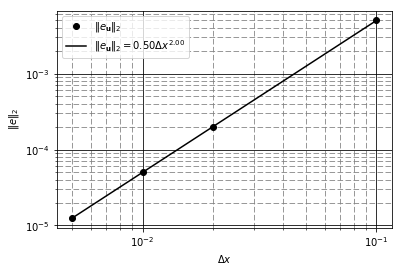

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dx=np.array([0.1,0.02,0.01,0.005])
error= 0.5*dx**2
a,b = np.polyfit(np.log(dx),np.log(error),1)

fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(dx,error,'ko',label='$\Vert e_{\mathbf{u}}\Vert_{2}$')

ax.plot(dx,np.exp(b)*dx**a,'-k',label='$\Vert e_{\mathbf{u}}\Vert_{2}=%3.2f  \Delta x^{%3.2f}$' %(np.exp(b),a))

ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(b=True, which='minor', color='grey', linestyle='--')
ax.grid(b=True, which='major', color='k', linestyle='-')
plt.ylabel('$\Vert e \Vert_2 $')
plt.xlabel('$\Delta x$')
plt.legend()
plt.show()

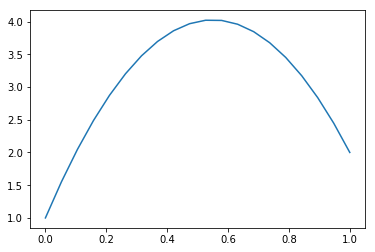

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
n=20
dx=1/(n-1)
mat = -2*np.eye(n)
mat.flat[1::n+1]=1
mat.flat[n::n+1]=1
mat[0,:]=0
mat[-1,:]=0
mat[0,0]=1
mat[-1,-1]=1
b = - 20*np.ones(n) * dx**2.
b[0]=1
b[-1]=2
T=np.linalg.solve(mat,b)
plt.plot(np.linspace(0,1,n),T)
plt.show()

In [12]:
import numpy as np
from scipy.integrate import simps

def f(x):    
    return x**2.

x=np.linspace(0,1,11)
# x est maintenant [0, 0.01, 0.02,...,1.]
y = f(x)
integral=np.trapz(y,x) # methode du trapeze
integralS=simps(y,x) # methode de Simpson
print("L'integrale trapz : ",integral )
print("L'integrale simps : ",integralS )
print("La solution : ", 1./3.)


L'integrale trapz :  0.335
L'integrale simps :  0.333333333333
La solution :  0.3333333333333333


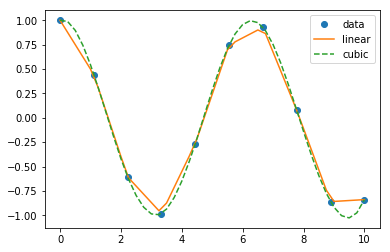

In [20]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=10, endpoint=True)
y = np.cos(x)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
 
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [21]:
from sympy import *

#define symbolic variables
x,y = symbols("x y")
expr = cos(x) + 1



# On peut aussi definir une formule par un "string"
str_expr = "x**2 + 3*x - 1/2"
expr2 = sympify(str_expr)
expr2

x**2 + 3*x - 1/2

In [22]:
expr.subs(x,1.)

1.54030230586814

In [23]:
expr.subs(x,y)

cos(y) + 1

In [24]:
from sympy import *

#define symbolic variables
x,y,a = symbols("x y a")

def laplacian(u):
	return diff(u,x,x)+diff(u,y,y)

u=sin(a*x)*cos(a*y)
laplacian(u)

-2*a**2*sin(a*x)*cos(a*y)

In [27]:
from  sympy import *

#define symbolic variables
x,y,a = symbols("x y a")

u=sin(x)*exp(x)
#Integrale symbolique sans borne
integrate(u,x)



exp(x)*sin(x)/2 - exp(x)*cos(x)/2

In [26]:
#Integrale symbolique avec bornes
v=exp(-x)
integrate(v,(x,0,oo))

1